In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

from os.path import join

plt.style.use(["seaborn", "thesis"])

/home/jo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
plt.rc("figure", figsize=(8,4))

In [3]:
figure_save_path = "/home/jo/Repos/MastersThesis/Application/figures/"

# Data 

In [4]:
from SCFInitialGuess.utilities.dataset import ScreenedData

target = "P"
r_max = 10 # 10 angstrom

data = ScreenedData(r_max)

data.include(data_path = "../../dataset/MethanT/", postfix = "MethanT", target=target)
data.include(data_path = "../../dataset/MethanT2/", postfix = "MethanT2", target=target)
data.include(data_path = "../../dataset/MethanT3/", postfix = "MethanT3", target=target)
data.include(data_path = "../../dataset/MethanT4/", postfix = "MethanT4", target=target)

data.include(data_path = "../../dataset/EthanT/",  postfix = "EthanT", target=target)
data.include(data_path = "../../dataset/EthanT2/", postfix = "EthanT2", target=target)
data.include(data_path = "../../dataset/EthanT3/", postfix = "EthanT3", target=target)
data.include(data_path = "../../dataset/EthanT4/",  postfix = "EthanT4", target=target)
data.include(data_path = "../../dataset/EthanT5/", postfix = "EthanT5", target=target)
data.include(data_path = "../../dataset/EthanT6/", postfix = "EthanT6", target=target)

data.include(data_path = "../../dataset/EthenT/",  postfix = "EthenT", target=target)
data.include(data_path = "../../dataset/EthenT2/", postfix = "EthenT2", target=target)
data.include(data_path = "../../dataset/EthenT3/", postfix = "EthenT3", target=target)
data.include(data_path = "../../dataset/EthenT4/",  postfix = "EthenT4", target=target)
data.include(data_path = "../../dataset/EthenT5/", postfix = "EthenT5", target=target)
data.include(data_path = "../../dataset/EthenT6/", postfix = "EthenT6", target=target)

data.include(data_path = "../../dataset/EthinT/",  postfix = "EthinT", target=target)
data.include(data_path = "../../dataset/EthinT2/", postfix = "EthinT2", target=target)
data.include(data_path = "../../dataset/EthinT3/", postfix = "EthinT3", target=target)

#data.include(data_path = "../../dataset/QM9/", postfix = "QM9-300")

# Analysize 

In [5]:
len(data.molecules[0]), len(data.molecules[1]), len(data.molecules[2])

(7071, 1774, 2225)

In [6]:
np.sum([len(data.molecules[0]), len(data.molecules[1]), len(data.molecules[2])])

11070

In [7]:
counter = {}
for mol in (data.molecules[0] + data.molecules[1] + data.molecules[2]):
    for atom in mol.species:
        counter[atom] = counter.get(atom, 0) + 1
        
print(counter)

{'C': 19617, 'H': 43738}


# Distances 

In [8]:
def distances(mol):
    
    r = []
    
    for i, geom_i in enumerate(mol.geometry):
        for j, geom_j in enumerate(mol.geometry):
            
            # avoid duplicates
            if i < j:
                continue
                
            # only count C-H distances
            if set([geom_i[0], geom_j[0]]) == set(["H", "C"]):
                r.append(
                    np.sqrt(np.sum((np.array(geom_i[1]) - np.array(geom_j[1]))**2))
                )
    
    return r
            
def distances_batch(moles):
    
    r = []
    for mol in moles:
        r += distances(mol)
        
    return r

In [9]:
r_train = distances_batch(data.molecules[0])
r_validation = distances_batch(data.molecules[1])
r_test = distances_batch(data.molecules[2])

In [10]:
np.sum(np.array(r_test) > 15)

0

## Histogram 

In [11]:
n_bins = 30
#offset = np.min(E)
hist_train, edges = np.histogram(r_train, bins=n_bins, density=True)
hist_validation, _ = np.histogram(r_validation, bins=edges, density=True)
hist_test, _ = np.histogram(r_test, bins=edges, density=True)


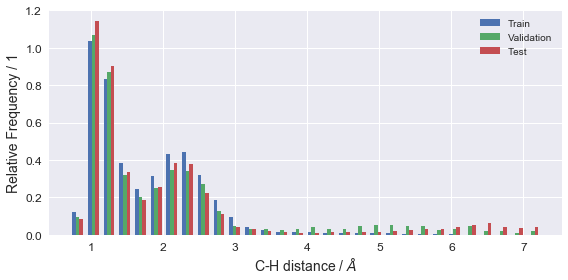

In [12]:
centers = (edges[:-1] + edges[1:]) / 2
width = np.mean(np.diff(centers)) * 0.23
plt.bar(centers - width, hist_train, width=width, label="Train")
plt.bar(centers, hist_validation, width=width, label="Validation")
plt.bar(centers + width, hist_test, width=width, label="Test")

plt.ylabel("Relative Frequency / 1")
plt.xlabel("C-H distance / $\AA$")

plt.tight_layout()
plt.legend()
plt.savefig(figure_save_path + "CHDistanceDistributionCarbs.pdf")

plt.show()

# Energies 

In [12]:
from SCFInitialGuess.utilities.analysis import measure_hf_energy

E_train = np.array(measure_hf_energy(data.T[0], data.molecules[0]))
E_validation = np.array(measure_hf_energy(data.T[1], data.molecules[1]))
E_test = np.array(measure_hf_energy(data.T[2], data.molecules[2]))

ValueError: cannot reshape array of size 7396 into shape (7396,7396)

In [ ]:
n_bins = 50

hist_train, edges = np.histogram(E_train, bins=n_bins, density=True)
hist_validation, _ = np.histogram(E_validation, bins=edges, density=True)
hist_test, _ = np.histogram(E_test, bins=edges, density=True)

In [ ]:
centers = (edges[:-1] + edges[1:]) / 2
width = np.mean(np.diff(centers)) * 0.3

plt.bar(centers - width, hist_train, width=width)
plt.bar(centers , hist_validation, width=width)
plt.bar(centers, hist_test, width=width)


plt.ylabel("Relative Frequency / 1")
plt.xlabel("HF Energy / Hartree")

plt.tight_layout()
plt.savefig(figure_save_path + "EnergyDistributionDataset.pdf")

plt.show()